# ECS7024 Statistics for Artificial Intelligence and Data Science

# Coursework 4 - Elliot Linsey

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Loading the Data
  * Section 1.2: Histograms of Variables
2. Section 2: Analysis 1 - Predicting Birth Rate
  * Section 2.1: Storks and Birth Rate 
  * Section 2.2: Humans and Birth Rate
  * Section 2.3: Bootstrap
  * Section 2.4: Differences in $r^2$ Score
3. Section 3: Predicting the Number of Storks 
  * Section 3.1: Creating New Variables
  * Section 3.2: Multiple Linear Regression
  * Section 3.3: Predicted vs Actual Values
  * Section 3.4: Bootstrap 2
  * Section 3.5: Differences in RMSE
  * Section 3.6: Predictor Impact
4. Conclusion

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=3)

## Section 1: Introduction

There are two aims of this document, one is to use regression models to predict and explain the variability in the number of births. We will achieve this by using two different predictors separately: the number of storks and the population size. We will then use a bootstrap technique to estimate the distribution of the difference of the $r^2$ score for both models.

The second part of this document uses regression models to predict the number of storks. The predictors are at first the land area, then another regression is performed using multiple linear regression. The predictors for multiple linear regression are created from variables within the original dataset. These new predictors are Suitable Area which is determined from SuitableAreaPercent and Area. The second predictor is Population Density which is derived from Humans and Area. The bootstrap technique is then utilised again to estimate the distribution of the difference of the root mean squared error parameter for both models.

## 1.1: Loading the Data

Here we load the data into a dataframe, one additional variable has been appended to the original dataset, this being SuitableAreaPercent.

In [5]:
df = pd.read_csv('storks.csv')
df

Country    Area  Storks  Humans  BirthRate  SuitableAreaPercent
0       Albania   28750     100     3.2         83                55.68
1       Austria   83860     300     7.6         87                38.34
2       Belgium   30520       1     9.9        118                65.93
3      Bulgaria  111000    5000     9.0        117                57.99
4       Denmark   43100       9     5.1         59                81.46
5        France  544000     140    56.0        774                58.47
6       Germany  357000    3300    78.0        901                59.81
7        Greece  132000    2500    10.0        106                47.31
8       Holland   41900       4    15.0        188                70.96
9       Hungary   93000    5000    11.0        124                75.86
10        Italy  301280       5    57.0        551                60.30
11       Poland  312680   30000    38.0        610                64.09
12     Portugal   92390    1500    10.0        120                52.51
13      Romania  237500    5000    23.0        367                62.49
14        Spain  504750    8000    39.0        439                59.57
15  Switzerland   41290     150     6.7         82                43.19
16       Turkey  779450   25000    56.0       1576                65.97

## Section 1.2: Histograms of Variables

Our initial look at the distributions of the variables shows a high level of positive skew. This may negatively affect our regression and bootstrap methods as we also have a low number of samples with only 17 countries. 

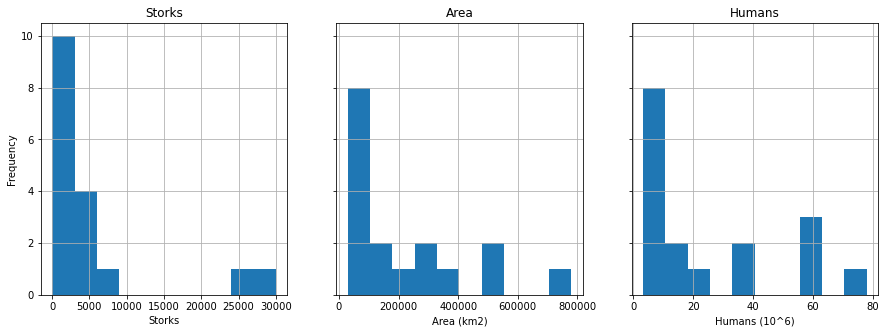

In [6]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5),sharey=True)
ax1 = df.Storks.hist(ax=ax1)
ax1.set_xlabel('Storks')
ax1.set_ylabel('Frequency')
ax1.set_title('Storks')
ax2 = df.Area.hist(ax=ax2)
ax2.set_xlabel('Area (km2)')
ax2.set_title('Area')
ax3 = df.Humans.hist(ax=ax3)
ax3.set_xlabel('Humans (10^6)')
ax3.set_title('Humans')
plt.show()

## Section 2: Analysis 1 - Predicting Birth Rate



## Section 2.1: Storks and Birth Rate

Plotting an initial scatter graph of Storks vs BirthRate, we see a fairly spread out distribution of points. A number of countries have very low numbers of storks with a high variance in terms of birth rate. When we assess the correlation between the two variables however, we find a fairly strong positive correlation of 0.62. 

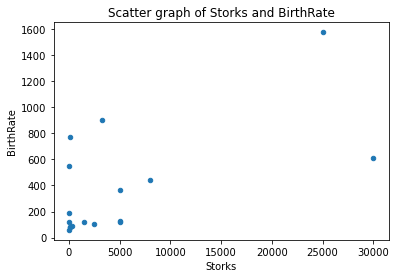

Correlation between Storks and BirthRate: 0.62


In [7]:
df.plot.scatter('Storks','BirthRate')
plt.title('Scatter graph of Storks and BirthRate')
plt.show()
print('Correlation between Storks and BirthRate: ' + str(round(df['Storks'].corr(df.BirthRate),3)))

Here I convert the columns we will use in the future regressions from panda Series to numpy arrays. I then initialise and fit the first regresson of our Storks predictor and target BirthRate.

In [8]:
storks = df.Storks.to_numpy().reshape(-1,1)
humans = df.Humans.to_numpy().reshape(-1,1)
area = df.Area.to_numpy().reshape(-1,1)
y = df.BirthRate.to_numpy().reshape(-1,1)
reg = LinearRegression().fit(storks,y)

Although the data suggests a strong positive correlation, when fitting the line of regression we see that it only passes close to 3 points. The $r^2$ score is a value of 0.385 which is not very high and implies that only 38.5% of the variance within the data has been accounted for. This suggests that the remaining 61.5% is still unaccounted for and thus the effect of storks on the variance of BirthRate is quite low. 

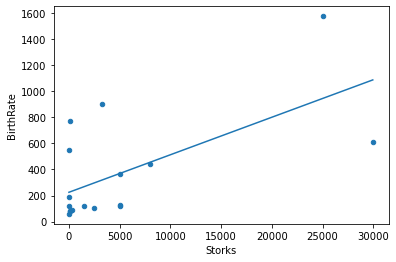

In [9]:
ranges = np.arange(0,30000,50).reshape(-1,1)
y_ranges = reg.predict(ranges)
df.plot.scatter('Storks','BirthRate')
plt.plot(ranges,y_ranges)
plt.show()

In [10]:
print(f'Regression Coefficient: {np.round(reg.coef_.squeeze(),3)}')
print(f'Regression Intercept: {np.round(reg.intercept_.squeeze(),3)}')
print(f'r2 Score: {np.round(reg.score(storks,y),3)}')

Regression Coefficient: 0.029
Regression Intercept: 225.029
r2 Score: 0.385


## Section 2.2: Humans and Birth Rate

In plotting the initial scatter graph for Humans and BirthRate we can instantly see a clearer positive correlation. This is confirmed in calculating the correlation coefficient between the two, which equals 0.851.  

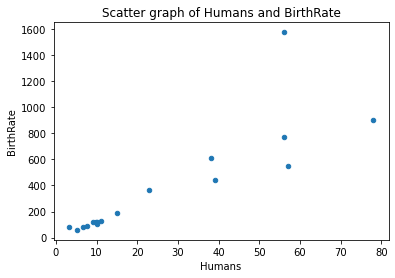

Correlation between Humans and BirthRate: 0.851


In [11]:
df.plot.scatter('Humans','BirthRate')
plt.title('Scatter graph of Humans and BirthRate')
plt.show()
print('Correlation between Humans and BirthRate: ' + str(round(df['Humans'].corr(df.BirthRate),3)))

The regression line for these 2 variables is far closer to the plotted points, indicating a better fit. The $r^2$ score is also much high, accounting for 72.5% of the variance within the data. However, the intercept is slightly nonsensical as it predicts that when you have 0 Humans, you have a BirthRate of -8 which is logically impossible. 

It is important when comparing the regression coefficients that you take into account their scaling. For example, the Storks and BirthRate regression has a coefficient of 0.029 whilst the coefficient for Humans and BirthRate is 14.834. Whilst the Humans coefficient is far larger than Storks, they are both on vastly different scales with Humans having a range of 0 to 80 and Storks having a range of 0 to 30000. When you look at both the actual lines drawn on the graphs, you see that they have quite similar gradients. The coefficients are so different as if we used the coefficient of Humans (14.834) to predict BirthRate values for the Storks graph, we would have extremely high and very wrong values. This is important to remember later when performing multiple linear regression which will have more than one coefficient.   

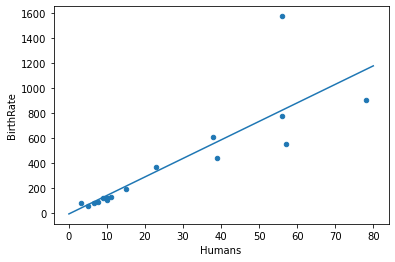

Regression Coefficient: 14.834
Regression Intercept: -8.445
r2 Score: 0.725


In [12]:
reg2 = LinearRegression().fit(humans,y)
ranges2 = np.arange(0,85,5).reshape(-1,1)
y_ranges2 = reg2.predict(ranges2)
df.plot.scatter('Humans','BirthRate')
plt.plot(ranges2,y_ranges2)
plt.show()
print(f'Regression Coefficient: {np.round(reg2.coef_.squeeze(),3)}')
print(f'Regression Intercept: {np.round(reg2.intercept_.squeeze(),3)}')
print(f'r2 Score: {np.round(reg2.score(humans,y),3)}')

## Section 2.3: Bootstrap 

Within this section we will use the bootstrap technique to estimate the distribution of $r^2$ scores for both regressions of Storks and BirthRate and Humans and BirthRate. Then, we will estimate the distribution of differences of $r^2$ scores between these two regressions and find the 90% confidence intervals of the data. 

Below, I create a function that automates generating the $r^2$ score with one predictor variable and test it on the previous variables of Storks and BirthRate to make sure it calculates the same result. 

In [13]:
def doReg(predict,target):
    x = predict.to_numpy().reshape(-1,1)
    y = target.to_numpy().reshape(-1,1)    
    reg = LinearRegression().fit(x,y)
    return reg.score(x,y)

print(f'r2 Score of Storks and BirthRate: {np.round(doReg(df.Storks,df.BirthRate),3)}')

r2 Score of Storks and BirthRate: 0.385


Here is the bootstrap method, I create two empty lists to append $r^2$ scores. I choose random samples from the dataframe with replacement as well as making the sample the same size as the original dataframe. I then calculate the $r^2$ scores with my previous function 'doReg()' and corresponding predictors, then append the score to the corresponding 'results' list. I repeat this process 500 times so that these lists contains 500 $r^2$ scores each. 

In [16]:
results = []
results2 = []

for i in range(500):
    sample = np.random.choice(range(len(df)),replace=True, size=len(df))
    sample = df[['Humans','BirthRate', 'Storks']].iloc[sample]
    results.append(doReg(sample.Humans,sample.BirthRate))
    results2.append(doReg(sample.Storks,sample.BirthRate))
    
results_humans = pd.DataFrame(results).rename(columns={0:'R2 Scores_h'})
results_storks = pd.DataFrame(results2).rename(columns={0:'R2 Scores_s'})

Using these scores I plot a histogram to see the distributions. For the storks bootstrap (R2 Scores_s), the distribution appears to be bimodal with a peak around 0 and a peak centering around 0.4, with decreasing scores from 0.6 to 0.9. Considering our original $r^2$ score was 0.385, this peak around 0.4 is not surprising, however the high prevalence of scores around 0 may imply that our predictor variable does not account for the variance within the BirthRate data very well and that the specific result of 0.385 could have arisen due to random chance. 

Plotting the $r^2$ scores for the Humans bootstrap (R2 Scores_h) shows a very different distribution compared to Storks and BirthRate. Whilst it is still bimodal, with peaks centered around 0.75 and 9.5, the lowest score achieved is just below 0.6 which is very different from Storks and BirthRate. The distribution has a far smaller range in the higher regions of the $r^2$ score, this implies that our predictor variable may be better at accounting for variance within the BirthRate data. 

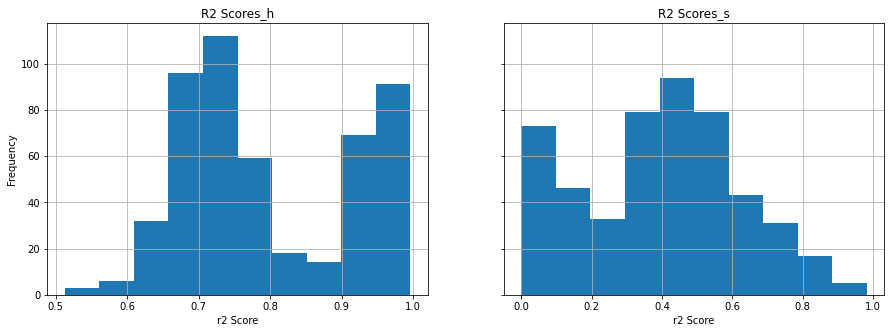

In [35]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),sharey=True)
ax1 = results_humans['R2 Scores_h'].hist(ax=ax1)
ax1.set_xlabel('r2 Score')
ax1.set_ylabel('Frequency')
ax1.set_title('R2 Scores_h')
ax2 = results_storks['R2 Scores_s'].hist(ax=ax2)
ax2.set_xlabel('r2 Score')
ax2.set_title('R2 Scores_s')
plt.show()

## Section 2.4: Differences in $r^2$ Score

In plotting the $r^2$ score differences, we again find a bimodal distribution with one peak around 0.25 and another peak around 0.9. The reason for these two peaks may be related to our original dataset and how the bootstrap works. Within the original dataset is the data for Turkey which has very high values and which may be skewing our results. As the bootstrap chooses samples randomly, some of the samples will not include Turkey at all or include it multiple times which may be enough to result in this type of bimodal distribution. 

The 90% confidence intervals calculated range from just below 0 to just over 9. The interpretation of this is that if we were to run this experiment multiple times, 90% of the time our difference in $r^2$ score would fall within this range. This means that there is a chance that there will be no difference between scores as 0.0 falls within this range and therefore we cannot be confident that one model explains the variability of the data better than the other at a confidence level of 90%. 

R2 Scores_h  R2 Scores_s      diff
0     0.954430     0.322294  0.632137
1     0.645691     0.800934 -0.155242
2     0.717450     0.478685  0.238765
3     0.912666     0.180773  0.731893
4     0.964833     0.173329  0.791505

90% range is -0.051 to 0.937


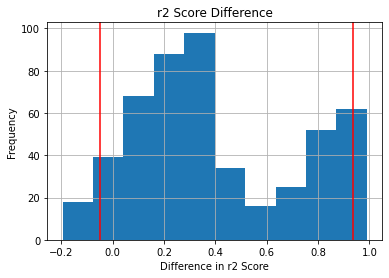

In [40]:
results_full = results_humans.join(results_storks)
results_full['diff'] = results_full['R2 Scores_h']-results_full['R2 Scores_s']
display(results_full.head())
results_full['diff'].hist()
plt.xlabel('Difference in r2 Score')
plt.ylabel('Frequency')
plt.title('r2 Score Difference')
plt.axvline(results_full['diff'].quantile(0.05), color='r')
plt.axvline(results_full['diff'].quantile(0.95), color='r')
print('90%% range is %4.3f to %4.3f' % 
      (results_full['diff'].quantile(0.05), results_full['diff'].quantile(0.95)))

## Section 3.0: Predicting the Number of Storks

Within this section we are focusing on predicting the number of storks using linear regression and then multiple linear regression as well as using different predictors.

Below, we perform a linear regression using Area to predict Storks. We can initally see that up to the 250,000 mark for Area, the points are quite close to the line and there is a fairly clear positive correlation. However, after this point the distribution is far more scattered and it does not appear to fit the line. The $r^2$ score is 0.336 which is quite low, showing that only 33.6% of the data variance is accounted for by using Area as a predictor. We also introduce a new parameter for scoring, that being Root Mean Squared Error. This can be used to compare models and is useful to see how accurately a model has predicted y-values. The lower the RMSE the better the model has performed at predicting y-values, this also has to take into account the scale of the variables. Here we achieve an RMSE of 6984.767. We can interpret this value as the average error between the predicted and actual values. This value is quite high as Storks only ranges from 0 to 30000. However, as the RMSE is an estimator of the mean it is therefore susceptible to outliers. From looking at the data, the extremely high values of Storks at 30000 (Poland) and 25000 (Turkey) may be influencing this RMSE score and the regression may be more accurate by removing them.  

Coefficients: 0.023
Intercept: -60.687
r2 Score: 0.336
RMSE: 6984.767


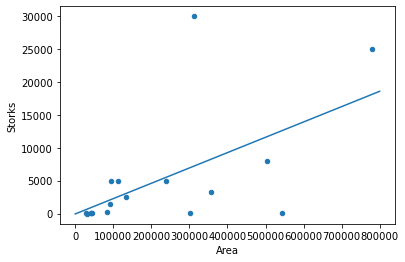

In [25]:
reg3 = LinearRegression().fit(area,storks)
df.plot.scatter('Area','Storks')
ranges3 = np.arange(0,810000,10000).reshape(-1,1)
plt.plot(ranges3,reg3.predict(ranges3))
reg3.score(area,storks)
print('Coefficients: ' + str(np.round(reg3.coef_.squeeze(),3)))
print('Intercept: ' + str(np.round(reg3.intercept_.squeeze(),3)))
print('r2 Score: ' + str(np.round(reg3.score(area,storks),3)))
print('RMSE: ' + str(np.round(mean_squared_error(storks, reg3.predict(area), squared=False),3)))

## Section 3.1: Creating New Variables

The variables required for the multiple linear regression are Population Density (of humans) and Suitable Area (for Stork life). To create Population Density, we first multiply Humans by $10^6$ to get the original values, for example, 3.2 = 3,200,000 people. We then divide this value by the corresponding Area value to get the amount of people per km<sup>2</sup>

The Suitable Area is calculated by turning SuitableAreaPercent back into a decimal by dividing by 100, then multiplying this by Area.  

In [26]:
df['pop_dens'] = df.Humans*10**6/df.Area
df['suitable_area'] = df.Area*(df.SuitableAreaPercent/100)
df.head()

Country    Area  Storks  Humans  BirthRate  SuitableAreaPercent  \
0   Albania   28750     100     3.2         83                55.68   
1   Austria   83860     300     7.6         87                38.34   
2   Belgium   30520       1     9.9        118                65.93   
3  Bulgaria  111000    5000     9.0        117                57.99   
4   Denmark   43100       9     5.1         59                81.46   

     pop_dens  suitable_area  
0  111.304348      16008.000  
1   90.627236      32151.924  
2  324.377457      20121.836  
3   81.081081      64368.900  
4  118.329466      35109.260

In creating our new variables, we can see again that these are very positively skewed distributions which may affect the quality of our regressions and bootstraps. 

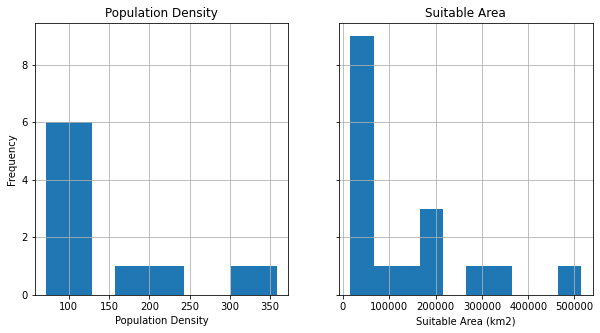

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5),sharey=True)
ax1 = df.pop_dens.hist(ax=ax1)
ax1.set_xlabel('Population Density')
ax1.set_ylabel('Frequency')
ax1.set_title('Population Density')
ax2 = df.suitable_area.hist(ax=ax2)
ax2.set_xlabel('Suitable Area (km2)')
ax2.set_title('Suitable Area')
plt.show()

## Section 3.2: Multiple Linear Regression

The results of this multiple linear regression do not appear to be much better than using just one predictor, with only slightly better R2 and RMSE scores achieved. 

In [28]:
X = np.column_stack((df.pop_dens,df.suitable_area))
reg4 = LinearRegression().fit(X,storks)
y_hat = reg4.predict(X)
print('R2 score: ' + str(np.round(reg4.score(X,storks),3)))
print('Coefficients: ' + str(reg4.coef_))
print('Intercept: ' + str(reg4.intercept_))
print('RMSE: ' + str(np.round(mean_squared_error(storks,y_hat,squared=False),3)))

R2 score: 0.393
Coefficients: [[-12.133   0.037]]
Intercept: [1881.387]
RMSE: 6677.029


## Section 3.3: Predicted vs Actual Values

As we have used more than 1 predictor, it is harder to plot the actual linear regression line as in this case it would be a plane due to having 2 predictors. To get around this we plot a scatter graph of the predicted y-values vs actual y-values, then plot a line of the predicted y-values. The better the regression, the closer to the line the points would be. We receive a similar distribution to our single linear regression above, that the regression is better at predicting values up to 5000 storks, but over this limit the distribution becomes more scattered and the regressor becomes less accurate with the high values of Turkey and Poland likely negatively affecting the results. 

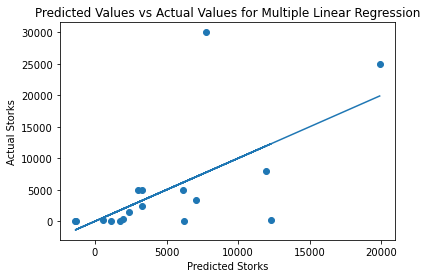

In [29]:
plt.scatter(y_hat,storks)
plt.plot(y_hat,y_hat)
plt.title('Predicted Values vs Actual Values for Multiple Linear Regression')
plt.xlabel('Predicted Storks')
plt.ylabel('Actual Storks')
plt.show()

## Section 3.4: Bootstrap 2

Below I create two functions (doReg2 and doReg3) that calculate RMSE for use in a bootstrap. doReg2 works for simple linear regression and doReg3 works for multiple linear regression with two predictors. I test them to make sure they produce the same results as above. 

In [30]:
def doReg2(predict,target):
    x = predict.to_numpy().reshape(-1,1)
    y = target.to_numpy().reshape(-1,1)    
    reg = LinearRegression().fit(x,y)
    y_hat = reg.predict(x)
    return mean_squared_error(y, y_hat, squared=False)

print(f'RMSE of Area and Storks: {np.round(doReg2(df.Area,df.Storks),3)}')

RMSE of Area and Storks: 6984.767


In [31]:
def doReg3(pred1,pred2,target):
    X = np.column_stack((pred1,pred2))
    y = target.to_numpy().reshape(-1,1)    
    reg = LinearRegression().fit(X,y)
    y_hat = reg.predict(X)
    return mean_squared_error(y, y_hat, squared=False)
print(f'RMSE of Population Density, Suitable Area and Storks: {np.round(doReg3(df.pop_dens,df.suitable_area,df.Storks),3)}')

RMSE of Population Density, Suitable Area and Storks: 6677.029


I perform another bootstrap, this time to compare the differences in RMSE between simple and multiple linear regression using their predictors on the target of stork population. 

In [32]:
results = []
results2 = []
for i in range(500):
    sample = np.random.choice(range(len(df)),replace=True, size=len(df))
    sample = df[['pop_dens','Area','Storks','suitable_area']].iloc[sample]
    results.append(doReg3(sample.pop_dens,sample.suitable_area,sample.Storks))
    results2.append(doReg2(sample.Area,sample.Storks))
results_p_s = pd.DataFrame(results).rename(columns={0:'RMSE_p'})
results_a_s = pd.DataFrame(results2).rename(columns={0:'RMSE_a'})
results_p_s.head()
results_a_s.head()

RMSE_a
0  3839.323652
1  7844.932029
2  4345.546397
3  8675.518740
4  6420.824112

Our plots for RMSE bootstrap scores are far more normally distributed, with both having peaks around 6500. This is a stark contrast to the $r^2$ scores of the previous bootstraps and may be related to the central limit theorem, that taking a bootstrap of estimator locators such as means of a skewed distribution will result in a normal distribution of those means. 

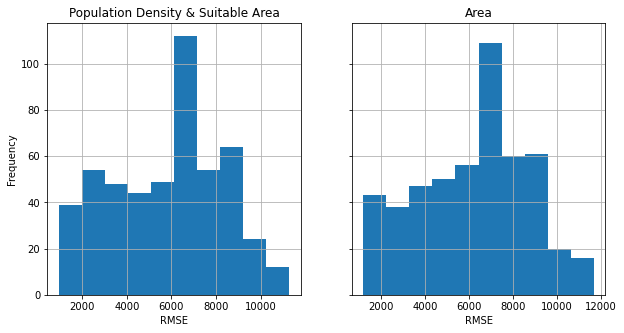

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5),sharey=True)
ax1 = results_p_s['RMSE_p'].hist(ax=ax1)
ax1.set_xlabel('RMSE')
ax1.set_ylabel('Frequency')
ax1.set_title('Population Density & Suitable Area')
ax2 = results_a_s['RMSE_a'].hist(ax=ax2)
ax2.set_xlabel('RMSE')
ax2.set_title('Area')
plt.show()

The differences in RMSE score are also fairly normally distributed, albeit with a slight positive skew, with a peak at 250. The 90% confidence intervals range from around 100 to 650, so we can expect that with multiple repeats, the difference will fall within this range 90% of the time. This is better at telling us whether one model is better than the other at predicting the number of storks as the difference of 0.0 does not fall within this range. Therefore, as the difference is calculated by minusing the multiple linear regression from the simple linear regression and the range of confidence intervals is positive, we can infer that the multiple linear regression has lower RMSE scores and is better at predicting stork numbers.

However, this difference ranges from 100 to 600 which isn't a very large amount in comparison to the scale of our RMSE values. As we have also seen above, neither model achieves good $r^2$ scores so it would not be recommended to use any of these predictors to obtain accurate predictions. 

RMSE_a       RMSE_p        diff
0  3839.323652  3492.039349  347.284303
1  7844.932029  7384.705887  460.226142
2  4345.546397  4026.940131  318.606266
3  8675.518740  8440.726869  234.791870
4  6420.824112  6251.457546  169.366567

90% range is 92.196 to 696.841


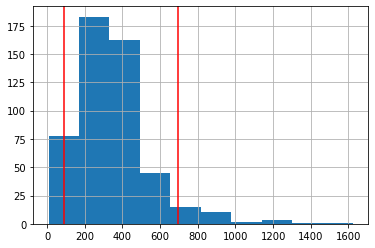

In [33]:
results_full2 = results_a_s.join(results_p_s)
results_full2['diff'] = results_full2['RMSE_a'] - results_full2['RMSE_p']
display(results_full2.head())
results_full2['diff'].hist()
plt.axvline(results_full2['diff'].quantile(0.05), color='r')
plt.axvline(results_full2['diff'].quantile(0.95), color='r')
print('90%% range is %4.3f to %4.3f' % 
      (results_full2['diff'].quantile(0.05), results_full2['diff'].quantile(0.95)))

## Section 3.5: Predictor Impact

Investigating the predictors in our multiple linear regression shows us that the suitable area coefficient has a far greater impact on the variance of storks with 71% compared to -15% for human population density. This makes sense as you would expect a country with more suitable area to have a higher number of storks. It also goes against the initial claim that the higher number of storks leads to higher birth rates (in this case equating higher population densities with higher birth rates), as we can see that having a higher population density appears to decrease the numbers of storks. 

In [34]:
score_range = df.Storks.quantile(0.9) - df.Storks.quantile(0.1)
pop_dens_range = df.pop_dens.quantile(0.9) - df.pop_dens.quantile(0.1)
suitable_area_range = df.suitable_area.quantile(0.9) - df.suitable_area.quantile(0.1)
print(f'The change in Storks (as a percent of its range) given by the pop_dens coefficient (over its range) is {np.round(100*(reg4.coef_[0][0]*pop_dens_range)/score_range,2)}%')
print(f'The change in Storks (as a percent of its range) given by the suitable_area coefficient (over its range) is {np.round(100*(reg4.coef_[0][1]*suitable_area_range)/score_range,2)}%')

The change in Storks (as a percent of its range) given by the pop_dens coefficient (over its range) is -15.1%
The change in Storks (as a percent of its range) given by the suitable_area coefficient (over its range) is 71.56%


## Conclusion

Throughout the investigation of this notebook, we have used linear regression to predict the BirthRate and number of Storks by country. We have used a combination of simple and multiple linear regression, bootstrap methods, as well as two different scoring metrics, that of $r^2$ and RMSE, to compare our models. 

We have found that at a confidence threshold of 90%, we cannot be confident that using a regression model of Storks or Humans is better than one or the other. This is due to a difference of 0.0 falling into the 90% confidence range for $r^2$ score when comparing the two models, and therefore there is a chance that there is no difference between either one. However, this is a small dataset which contains two possible outliers (Poland and Turkey) which may be skewing the results and causing issues with the bootstrap method. 

We have found that at a confidence threshold of 90%, we are more confident when predicting the number of Storks using multiple linear regression. This is because the difference in RMSE scores between using solely Area to predict Storks compared to using multiple predictors of Population Density and Suitable Area fell into a range of approximately 100 to 650. This showed that using multiple linear regression was a more accurate model for predicting the number of Storks, however the difference was fairly small and the resulting $R^2$ scores of both models were still quite bad. Through investigating the change in Storks given by our coefficients for multiple linear regression, we also found that Suitable Area gave a more positive impact whilst human Population Density gave a negative impact, potentially going against what was found in the original paper (*Robert Matthews. “Storks Deliver Babies (p = 0.008)”. Teaching Statistics. Volume 22, Number 2, Summer 2000, p36-8*). 

Overall, we have found that none of these predictors, whether used in a simple or multiple linear regression, give a particularly accurate prediction for either BirthRate or Stork numbers. Our use of bootstrap allowed us to compare models but we found that if we were to repeat the experiment many times, 90% of the time the difference would either be potentially 0 (for $r^2$ scores), or small in terms of the scale of our errors (RMSE). 


Thanks for reading!

Elliot Linsey, QMUL